# Análisis exploratorio de datos

## Librerias

In [579]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime, time
import seaborn as sns
import plotly.graph_objects as go
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.cm as cm
import matplotlib.patches as mpatches

## Lectura de datos

In [580]:
df = pd.read_csv('./data/processed/dataset_preprocessed.csv')

# Eliminar la columna 'Unnamed: 0' si existe
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

df.head()

,id,edad,sexo,estado,peso total,Oxalis,Quercus,Cyp.bulb,Phaseolus,Tephoria,...,time,dist_camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland,gap
0,2014-104,J,Female,NM,9.7584,9.7584,0.0,0.000,0.0000,0.0000,...,14:20,251.86,462,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600,Rocky Mountain Ponderosa Pine Woodland
1,2014-105,J,Male,NM,3.9632,3.9632,0.0,0.000,0.0000,0.0000,...,14:20,251.86,462,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600,Rocky Mountain Ponderosa Pine Woodland
2,2016-133,A,Female,AZ,5.4562,3.8238,0.0,0.000,0.6148,0.0726,...,17:00,574.06,515,15.954167,1527.0,31.375725,-110.530491,0.785803,1.245916,Madrean Encinal
3,2014-28,J,Female,NM,4.4976,3.7076,0.0,0.000,0.0000,0.0000,...,16:10,23.07,385,10.979167,1952.0,33.176791,-107.735593,0.464732,0.764466,Colorado Plateau Pinyon-Juniper Woodland
4,2016-132,J,Male,AZ,5.4630,2.2011,0.0,0.778,0.3908,0.0000,...,16:00,236.76,521,16.133333,1507.0,31.353053,-110.531060,1.680150,1.541562,Apacherian-Chihuahuan Mesquite Upland Scrub


## Descripción de los Datos

In [581]:
columns = list(df.columns)
print(columns)

['id', 'edad', 'sexo', 'estado', 'peso total', 'Oxalis', 'Quercus', 'Cyp.bulb', 'Phaseolus', 'Tephoria', 'Caracoles', 'Insectos', 'Physalis', 'Vitis.arizonica', 'Lupinus', 'Lotus.wrightii', 'Cyp.rizo', 'Commelina.dianthifolia', 'Kallstroemia.parviflora', 'Fabacea', 'Ipomoea', 'Desmodium', 'Euphorbia probably E. bilobata', 'Talinum.aurantiacum', 'SP17', 'Heterosperma.pinnatum', 'SP19', 'Desmanthus cooleyi', 'Celtis.reticulata', 'Panicum.hirticaule', 'Setaria', 'Malvacea', 'Cyperus.fendlerianus', 'SP26', 'Setaria.1', 'SP28', 'Cryptantha.cinerea', 'Sphaeralcea.fendleri', 'Hymenopappus.flavescens', 'Solaneaceae', 'Euphorbia', 'SP34', 'Piptochaetium.fimbriatum', 'Acalypha.neomexiacana', 'Fabaceae', 'Lupinus.neomexicanus', 'Mirabilis.longiflora', 'SP44', 'Prunus.virginiana', 'SP46', 'Urochloa', 'Cyperaceae', 'Pinus.edulis', 'Fabacea.1', 'SP51', 'SP52', 'Calliandra.humilis', 'Fabaceae.1', 'Solanum', 'Calliandra.eriophylla', 'Desmanthus.cooleyi', 'Sp59', 'Croton.pottsii', 'Lupinus.1', 'Polygon

**Variables:** ['id', 'edad', 'sexo', 'estado', 'peso total', 'Oxalis', 'Quercus', 'Cyp.bulb', 'Phaseolus', 'Tephoria', 'Caracoles', 'Insectos', 'Physalis', 'Vitis.arizonica', 'Lupinus', 'Lotus.wrightii', 'Cyp.rizo', 'Commelina.dianthifolia', 'Kallstroemia.parviflora', 'Fabacea', 'Ipomoea', 'Desmodium', 'Euphorbia probably E. bilobata', 'Talinum.aurantiacum', 'SP17', 'Heterosperma.pinnatum', 'SP19', 'Desmanthus cooleyi', 'Celtis.reticulata', 'Panicum.hirticaule', 'Setaria', 'Malvacea', 'Cyperus.fendlerianus', 'SP26', 'Setaria.1', 'SP28', 'Cryptantha.cinerea', 'Sphaeralcea.fendleri', 'Hymenopappus.flavescens', 'Solaneaceae', 'Euphorbia', 'SP34', 'Piptochaetium.fimbriatum', 'Acalypha.neomexiacana', 'Fabaceae', 'Lupinus.neomexicanus', 'Mirabilis.longiflora', 'SP44', 'Prunus.virginiana', 'SP46', 'Urochloa', 'Cyperaceae', 'Pinus.edulis', 'Fabacea.1', 'SP51', 'SP52', 'Calliandra.humilis', 'Fabaceae.1', 'Solanum', 'Calliandra.eriophylla', 'Desmanthus.cooleyi', 'Sp59', 'Croton.pottsii', 'Lupinus.1', 'Polygonaceae', 'Euphorbia.1', 'Calliandra', 'Solanum.1', 'SPA1', 'SPA2', 'Lotus', 'Bidens.leptocephala', 'SPA5', 'SPA6', 'Tephrosia', 'Asteraceae.Uropappus lindleyi', 'SPA9', 'SPA10', 'Ziziphus.obtisufolia', 'Aristida', 'Diodia.teres', 'Bothriochloa', 'Pinus.dulis', 'Paspalum.distichum', 'SPA17', 'SPA18', 'SPA19', 'Euphorbia.exstipulata', 'SPA21', 'Asteracea', 'SPA23', 'SPA24', 'Chilopsis.linearis', 'Sorghum.halepense', 'Amaranthus', 'Setaria nigricans', 'SPA29', 'SPA30', 'SPA31', 'SPA32', 'SPA33', 'SPA34', 'SPA35', 'SPA36', 'SPA37', 'SPA38', 'SPA39', 'SPA40', 'Agave.or.Yucca', 'SPA42', 'SPA43', 'SPA44', 'Sida', 'SPA46', 'SPA47', 'Tragia', 'Lupinus.2', 'SPA50', 'SPA51', 'SPA52', 'SPA53', 'SPA54', 'SPA55', 'Amaranthus.1', 'Desmodium.1', 'Bothriochloa.1', 'Euphorbia.2', 'SPA60', 'SPA61', 'SPA62', 'Phaseolus.1', 'SPA64', 'SPA65', 'Arachnida', 'Juniperus prob. deppeana', 'time', 'covey', 'dist camino', 'ppanual17', 'tmedia17', 'altitud', 'lat', 'lon', 'hcrop', 'hland', 'gap']

In [582]:
df.describe()

,peso total,Oxalis,Quercus,Cyp.bulb,Phaseolus,Tephoria,Caracoles,Insectos,Physalis,Vitis.arizonica,...,Arachnida,Juniperus prob. deppeana,dist_camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.0,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,2.059958,0.135306,0.183276,0.260930,0.398215,0.014997,0.000109,0.108142,0.048888,0.011067,...,0.000700,0.0,206.728500,437.018182,13.873466,1708.377273,32.217283,-108.940782,0.577650,1.044265
std,1.807237,0.817760,0.605746,0.737829,1.199566,0.063786,0.001246,0.385100,0.364621,0.113797,...,0.010383,0.0,178.399251,79.049142,2.088660,224.737164,0.814838,1.535809,0.490004,0.360545
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,6.400000,235.000000,7.054167,1206.000000,31.343850,-111.072099,0.000000,0.222691
25%,0.581442,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,80.172500,376.000000,12.379167,1566.750000,31.479233,-110.585248,0.131294,0.783493
50%,1.687295,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,171.920000,422.500000,14.354167,1658.000000,31.787750,-108.952256,0.534254,1.057318
75%,3.000075,0.000000,0.000000,0.000000,0.057800,0.000000,0.000000,0.020000,0.000000,0.000000,...,0.000000,0.0,272.860000,518.000000,15.543750,1901.000000,32.880501,-107.721568,0.845094,1.362937
max,9.758400,9.758400,3.620800,6.723300,7.326500,0.666200,0.018000,2.900000,4.471900,1.666400,...,0.154000,0.0,774.840000,620.000000,17.312500,2518.000000,34.037969,-105.354701,2.053079,1.796301


### Duplicado de datos

In [583]:
# Verifica si existen registros duplicados
df.duplicated().value_counts()

False    220
Name: count, dtype: int64

### Datos Faltantes

In [584]:
# Verificar si hay datos faltantes o nulos en cada columna
missing_data = df.isnull().sum()

# Filtrar las columnas que tienen datos faltantes
missing_columns = missing_data[missing_data > 0]

# Mostrar el número de valores faltantes por columna
print(missing_columns)

# Verificar si hay alguna columna con datos faltantes
has_missing_data = missing_data.any()

edad    1
dtype: int64


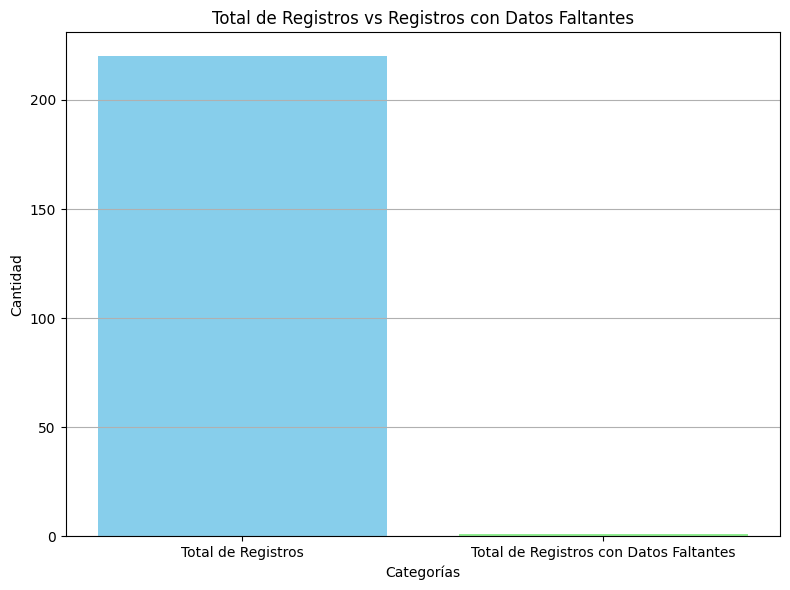

Total de Datos Faltantes: 220
Total de Registros con Datos Nulos: 1


In [585]:
# Calcular el total de datos faltantes en todo el DataFrame
total_faltantes = df.shape[0]

# Contar la cantidad de registros que tienen al menos un dato nulo en alguna columna
registros_con_nulos = df[df.isnull().any(axis=1)].shape[0]

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(['Total de Registros', 'Total de Registros con Datos Faltantes'], [total_faltantes, registros_con_nulos], color=['skyblue', 'lightgreen'])
plt.xlabel('Categorías')
plt.ylabel('Cantidad')
plt.title('Total de Registros vs Registros con Datos Faltantes')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Mostrar el total de datos faltantes y la cantidad de registros con datos nulos
print(f'Total de Datos Faltantes: {total_faltantes}')
print(f'Total de Registros con Datos Nulos: {registros_con_nulos}')


### Por tipos de variables

#### Elementos en la dieta de la codorniz

In [586]:
print(columns[5:-11])

['Oxalis', 'Quercus', 'Cyp.bulb', 'Phaseolus', 'Tephoria', 'Caracoles', 'Insectos', 'Physalis', 'Vitis.arizonica', 'Lupinus', 'Lotus.wrightii', 'Cyp.rizo', 'Commelina.dianthifolia', 'Kallstroemia.parviflora', 'Fabacea', 'Ipomoea', 'Desmodium', 'Euphorbia probably E. bilobata', 'Talinum.aurantiacum', 'SP17', 'Heterosperma.pinnatum', 'SP19', 'Desmanthus cooleyi', 'Celtis.reticulata', 'Panicum.hirticaule', 'Setaria', 'Malvacea', 'Cyperus.fendlerianus', 'SP26', 'Setaria.1', 'SP28', 'Cryptantha.cinerea', 'Sphaeralcea.fendleri', 'Hymenopappus.flavescens', 'Solaneaceae', 'Euphorbia', 'SP34', 'Piptochaetium.fimbriatum', 'Acalypha.neomexiacana', 'Fabaceae', 'Lupinus.neomexicanus', 'Mirabilis.longiflora', 'SP44', 'Prunus.virginiana', 'SP46', 'Urochloa', 'Cyperaceae', 'Pinus.edulis', 'Fabacea.1', 'SP51', 'SP52', 'Calliandra.humilis', 'Fabaceae.1', 'Solanum', 'Calliandra.eriophylla', 'Desmanthus.cooleyi', 'Sp59', 'Croton.pottsii', 'Lupinus.1', 'Polygonaceae', 'Euphorbia.1', 'Calliandra', 'Solanum.

In [587]:
# Crear un nuevo DataFrame con las columnas especificadas
df_dieta = df[columns[5:-11]].copy()
df_dieta.head()

,Oxalis,Quercus,Cyp.bulb,Phaseolus,Tephoria,Caracoles,Insectos,Physalis,Vitis.arizonica,Lupinus,...,Desmodium.1,Bothriochloa.1,Euphorbia.2,SPA60,SPA61,SPA62,Phaseolus.1,SPA64,SPA65,Arachnida
0,9.7584,0.0,0.000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.9632,0.0,0.000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.8238,0.0,0.000,0.6148,0.0726,0.0,0.0514,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.7076,0.0,0.000,0.0000,0.0000,0.0,0.7900,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.2011,0.0,0.778,0.3908,0.0000,0.0,0.0027,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [588]:
df_dieta.describe()

,Oxalis,Quercus,Cyp.bulb,Phaseolus,Tephoria,Caracoles,Insectos,Physalis,Vitis.arizonica,Lupinus,...,Desmodium.1,Bothriochloa.1,Euphorbia.2,SPA60,SPA61,SPA62,Phaseolus.1,SPA64,SPA65,Arachnida
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.0,220.0,220.0,220.0,220.0,220.0,220.0,220.0,220.0,220.000000
mean,0.135306,0.183276,0.260930,0.398215,0.014997,0.000109,0.108142,0.048888,0.011067,0.000157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000700
std,0.817760,0.605746,0.737829,1.199566,0.063786,0.001246,0.385100,0.364621,0.113797,0.002326,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010383
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
75%,0.000000,0.000000,0.000000,0.057800,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
max,9.758400,3.620800,6.723300,7.326500,0.666200,0.018000,2.900000,4.471900,1.666400,0.034500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.154000


##### Variables de alimentos 

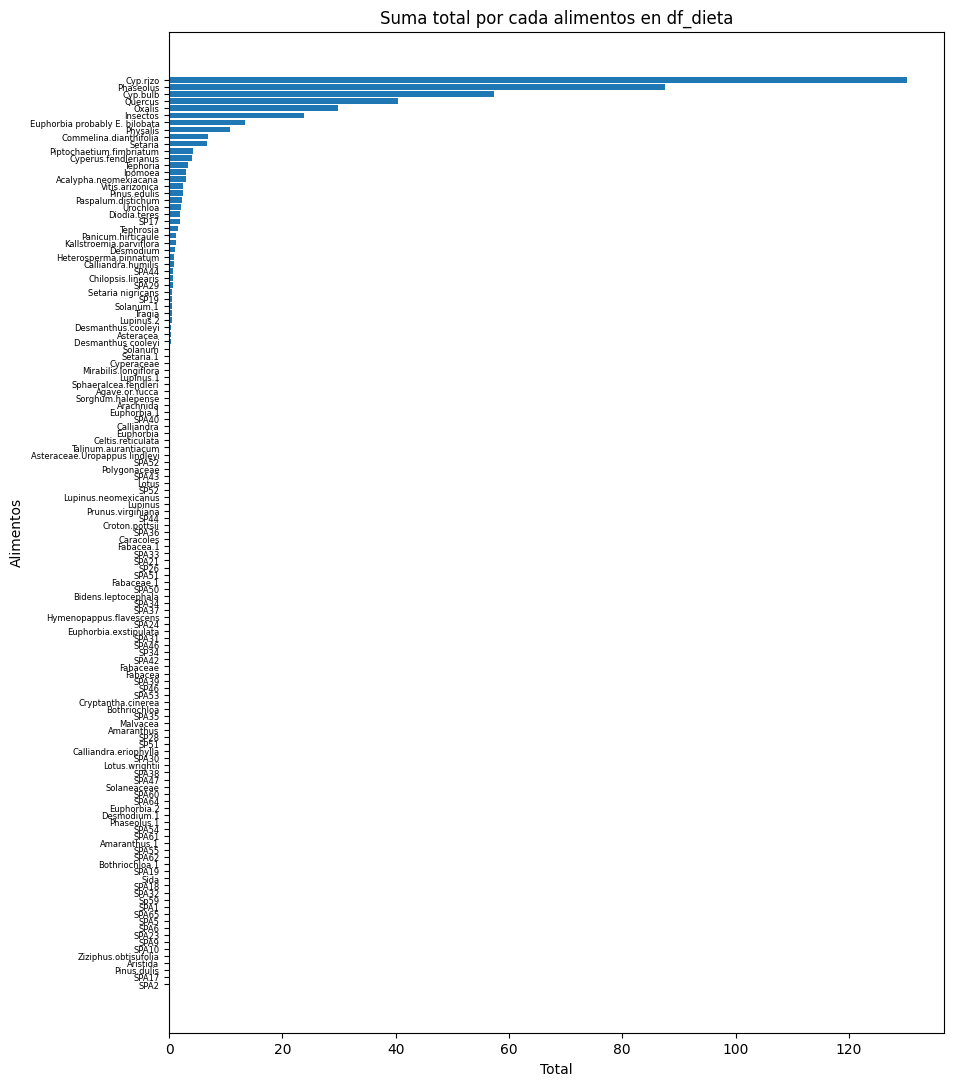

In [589]:
# Calcular los totales para cada columna y ordenar de mayor a menor
column_totals_sorted = df_dieta.sum().sort_values(ascending=True)

# Crear una gráfica de barras verticales ordenada de mayor a menor
plt.figure(figsize=(10, 13))
plt.barh(column_totals_sorted.index, column_totals_sorted.values)

# Ajustar el tamaño de la fuente de los nombres de las variables
plt.xticks(fontsize=10)
plt.yticks(fontsize=6)

# Añadir etiquetas y título
plt.xlabel('Total')
plt.ylabel('Alimentos')
plt.title('Suma total por cada alimentos en df_dieta')


# plt.savefig('./Graficos/sum_alimentos_ds.png', format='png')

# Guardar la gráfica
plt.savefig('./Graficos/sum_alimentos_ds.png')

# Mostrar la gráfica
plt.show()


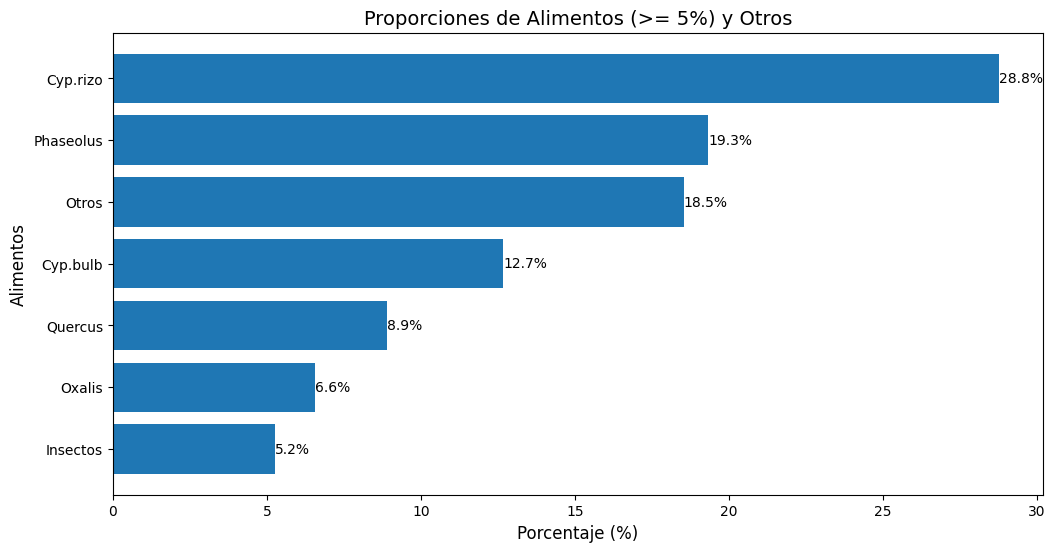

In [590]:
# Calcular los porcentajes para cada columna
column_percentages = df_dieta.sum() / df_dieta.sum().sum()

# Filtrar los alimentos que tienen al menos el 10% de la proporción
column_percentages_filtered = column_percentages[column_percentages >= 0.05]

# Calcular el porcentaje total de "Otros"
otros_percentage = 1 - column_percentages_filtered.sum()

# Crear un nuevo DataFrame con los alimentos que cumplen el criterio y "Otros"
df_plot = pd.concat([column_percentages_filtered, pd.Series({'Otros': otros_percentage})])

# Ordenar los porcentajes de mayor a menor
df_plot_sorted = df_plot.sort_values(ascending=True)

# Crear la gráfica de barras
plt.figure(figsize=(12, 6))
bars = plt.barh(df_plot_sorted.index, df_plot_sorted.values * 100, height=0.8)  # Multiplicar por 100 para obtener el porcentaje en lugar de la fracción

# Ajustar el espacio entre las etiquetas y las barras
plt.yticks(fontsize=10)  # Ajustar el valor de pad según sea necesario

# Añadir etiquetas y título
plt.ylabel('Alimentos', fontsize=12)
plt.xlabel('Porcentaje (%)', fontsize=12)
plt.title('Proporciones de Alimentos (>= 5%) y Otros', fontsize=14)

# Agregar los porcentajes al final de cada barra
for bar, percentage in zip(bars, df_plot_sorted.values * 100):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{percentage:.1f}%', ha='left', va='center')

# Guardar la gráfica
plt.savefig('./Graficos/principales-5%-alimentos_ds.png')

# Mostrar la gráfica
plt.show()

#### Variables Climatologicas y del individuo

In [591]:
print(columns[:5] + columns[-10:])

['id', 'edad', 'sexo', 'estado', 'peso total', 'time', 'dist_camino', 'ppanual17', 'tmedia17', 'altitud', 'lat', 'lon', 'hcrop', 'hland', 'gap']


In [592]:
# Crear una lista con las columnas 
nuevas_columnas = columns[:5] + columns[-10:]

# Crear un nuevo DataFrame con las columnas especificadas
df_all = df[nuevas_columnas].copy()

In [593]:
df_all.head()

,id,edad,sexo,estado,peso total,time,dist_camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland,gap
0,2014-104,J,Female,NM,9.7584,14:20,251.86,462,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600,Rocky Mountain Ponderosa Pine Woodland
1,2014-105,J,Male,NM,3.9632,14:20,251.86,462,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600,Rocky Mountain Ponderosa Pine Woodland
2,2016-133,A,Female,AZ,5.4562,17:00,574.06,515,15.954167,1527.0,31.375725,-110.530491,0.785803,1.245916,Madrean Encinal
3,2014-28,J,Female,NM,4.4976,16:10,23.07,385,10.979167,1952.0,33.176791,-107.735593,0.464732,0.764466,Colorado Plateau Pinyon-Juniper Woodland
4,2016-132,J,Male,AZ,5.4630,16:00,236.76,521,16.133333,1507.0,31.353053,-110.531060,1.680150,1.541562,Apacherian-Chihuahuan Mesquite Upland Scrub


In [594]:
df_all.describe()

,peso total,dist_camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,2.059958,206.728500,437.018182,13.873466,1708.377273,32.217283,-108.940782,0.577650,1.044265
std,1.807237,178.399251,79.049142,2.088660,224.737164,0.814838,1.535809,0.490004,0.360545
min,0.000000,6.400000,235.000000,7.054167,1206.000000,31.343850,-111.072099,0.000000,0.222691
25%,0.581442,80.172500,376.000000,12.379167,1566.750000,31.479233,-110.585248,0.131294,0.783493
50%,1.687295,171.920000,422.500000,14.354167,1658.000000,31.787750,-108.952256,0.534254,1.057318
75%,3.000075,272.860000,518.000000,15.543750,1901.000000,32.880501,-107.721568,0.845094,1.362937
max,9.758400,774.840000,620.000000,17.312500,2518.000000,34.037969,-105.354701,2.053079,1.796301


In [595]:
# Mostrar los tipos de datos de cada columna
print(df_all.dtypes)


id              object
edad            object
sexo            object
estado          object
peso total     float64
time            object
dist_camino    float64
ppanual17        int64
tmedia17       float64
altitud        float64
lat            float64
lon            float64
hcrop          float64
hland          float64
gap             object
dtype: object


##### Tiempo vs Peso total

In [596]:
# Convertir la columna 'time' a datetime
df_all['time'] = pd.to_datetime(df_all['time'], format='%H:%M', errors='coerce')

# Crear la columna 'Despues13'
df_all['Despues13'] = (df_all['time'].dt.hour >= 13).astype(int)

In [597]:
df_all

,id,edad,sexo,estado,peso total,time,dist_camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland,gap,Despues13
0,2014-104,J,Female,NM,9.7584,1900-01-01 14:20:00,251.86,462,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600,Rocky Mountain Ponderosa Pine Woodland,1
1,2014-105,J,Male,NM,3.9632,1900-01-01 14:20:00,251.86,462,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600,Rocky Mountain Ponderosa Pine Woodland,1
2,2016-133,A,Female,AZ,5.4562,1900-01-01 17:00:00,574.06,515,15.954167,1527.0,31.375725,-110.530491,0.785803,1.245916,Madrean Encinal,1
3,2014-28,J,Female,NM,4.4976,1900-01-01 16:10:00,23.07,385,10.979167,1952.0,33.176791,-107.735593,0.464732,0.764466,Colorado Plateau Pinyon-Juniper Woodland,1
4,2016-132,J,Male,AZ,5.4630,1900-01-01 16:00:00,236.76,521,16.133333,1507.0,31.353053,-110.531060,1.680150,1.541562,Apacherian-Chihuahuan Mesquite Upland Scrub,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,2015-59,A,Female,NM,0.3501,1900-01-01 13:00:00,86.99,315,14.458333,1543.0,32.590956,-107.920563,0.112925,1.628812,Apacherian-Chihuahuan Piedmont Semi-Desert Gra...,1
216,2015-6,J,Female,NM,0.1977,1900-01-01 12:30:00,127.25,324,11.175000,2023.0,33.688852,-107.330940,0.000000,1.796301,North American Warm Desert Bedrock Cliff and O...,0
217,2015-60,J,Female,NM,2.6084,1900-01-01 13:00:00,86.99,315,14.458333,1543.0,32.590956,-107.920563,0.065394,1.628812,Apacherian-Chihuahuan Piedmont Semi-Desert Gra...,1
218,2015-61,A,Male,NM,7.3265,1900-01-01 14:30:00,763.38,332,14.225000,1560.0,32.592245,-107.930243,0.000000,0.761439,Madrean Pinyon-Juniper Woodland,1


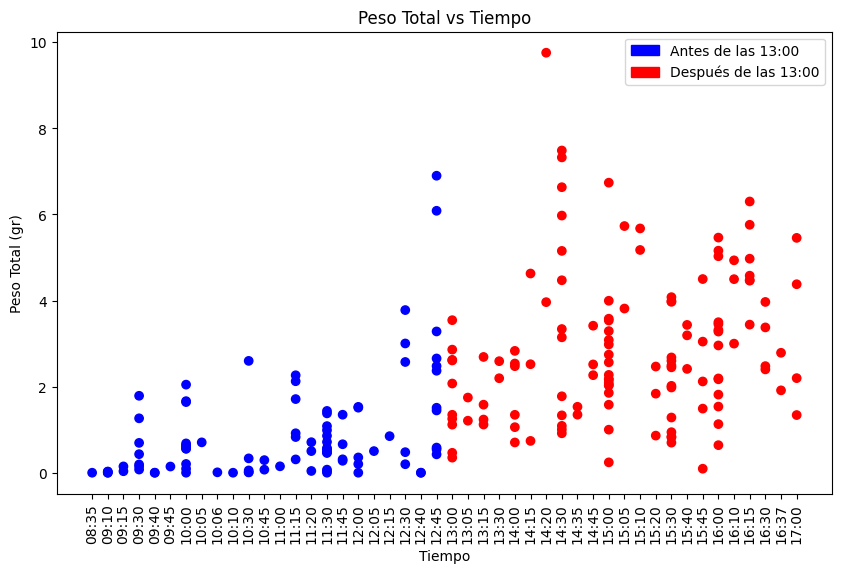

In [598]:
# Convertir la columna 'time' a datetime
df_all['time'] = pd.to_datetime(df_all['time'], format='%H:%M', errors='coerce')

df_all['time'] = df_all['time'].dt.strftime('%H:%M')
df_all = df_all.sort_values(by='time')

# Crear la gráfica de dispersión para todos los puntos
plt.figure(figsize=(10, 6))
plt.scatter(df_all['time'], df_all['peso total'],c=df_all['Despues13'], cmap='bwr')

# Añadir etiquetas y título
plt.xlabel('Tiempo')
plt.ylabel('Peso Total (gr)')
plt.title('Peso Total vs Tiempo')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=90)

before_patch = mpatches.Patch(color='blue', label='Antes de las 13:00')
after_patch = mpatches.Patch(color='red', label='Después de las 13:00')
plt.legend(handles=[before_patch, after_patch])


# Guardar la gráfica como imagen
plt.savefig('./Graficos/PesoTotal_vs_Tiempo.png', bbox_inches='tight')

# Mostrar la gráfica
plt.show()

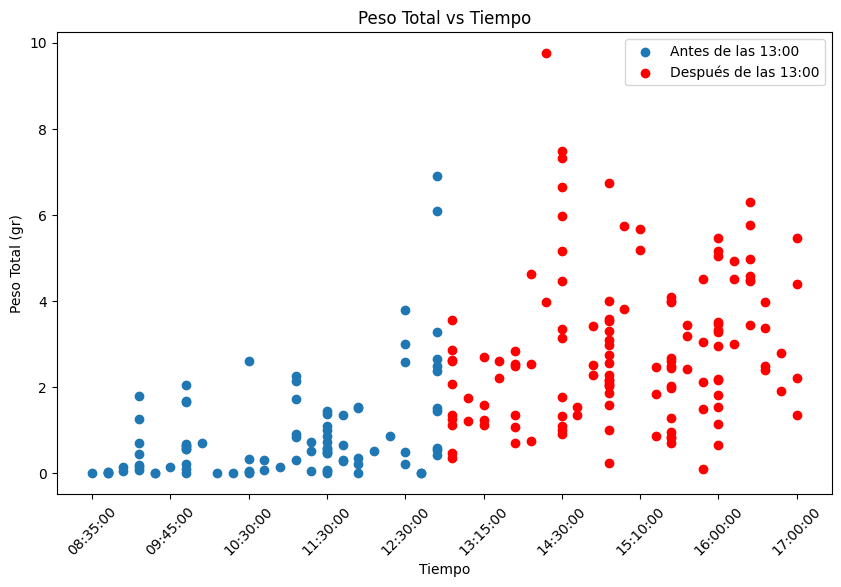

In [599]:
# Convertir la columna 'time' a datetime
df_all['time'] = pd.to_datetime(df_all['time'], format='%H:%M', errors='coerce')

# Filtrar los puntos que están después de las 13:00
df_despues_13 = df_all[df_all['Despues13']==1].copy()
df_antes_13 = df_all[df_all['Despues13']!=1].copy()

df_despues_13['time'] = (df_despues_13['time'].dt.time).astype(str)
df_antes_13['time'] = (df_antes_13['time'].dt.time).astype(str)

# Crear la gráfica de dispersión para todos los puntos antes de las 13:00
plt.figure(figsize=(10, 6))
plt.scatter(df_antes_13['time'], df_antes_13['peso total'], label='Antes de las 13:00')

# Crear la gráfica de dispersión para los puntos después de las 13:00 (en rojo)
plt.scatter(df_despues_13['time'], df_despues_13['peso total'], color='red', label='Después de las 13:00')

# Añadir etiquetas y título
plt.xlabel('Tiempo')
plt.ylabel('Peso Total (gr)')
plt.title('Peso Total vs Tiempo')

# Ordenar los ticks del eje x para evitar que aparezcan "todo hecho bolas"
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))  # Ajusta el número de ticks

# Mostrar la leyenda
plt.legend()

# Guardar la gráfica como imagen
# plt.savefig('./Graficos/PesoTotal_vs_Tiempo.png', bbox_inches='tight')

# Mostrar la gráfica
plt.show()

###### Sexo

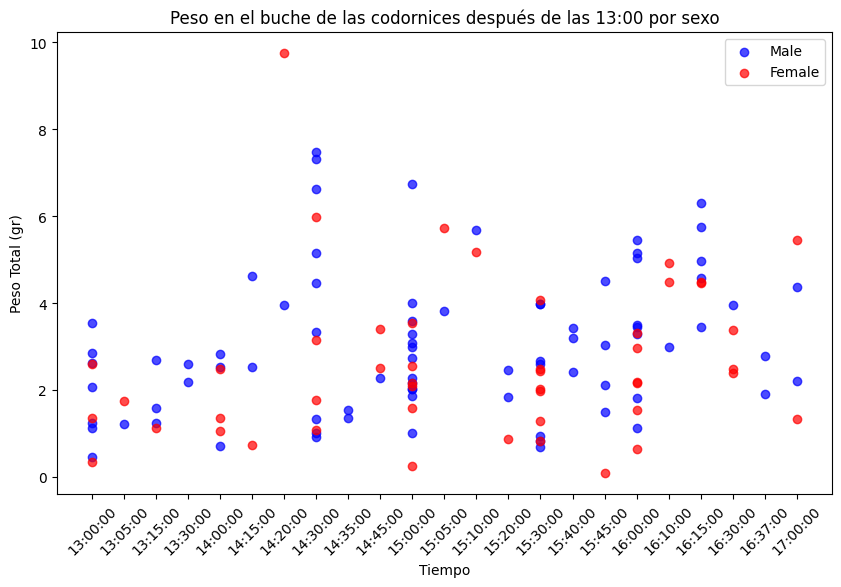

In [610]:
# Crear la gráfica de dispersión solo para df_mayor_13
plt.figure(figsize=(10, 6))

df_mayor_13['time'] = (df_mayor_13['time'].dt.time).astype(str)

# Filtrar por sexo y asignar colores
for sexo, color in zip(df_mayor_13['sexo'].unique(), ['blue', 'red', 'green']):  # Asigna colores según las categorías únicas de sexo
    df_sexo = df_mayor_13[df_mayor_13['sexo'] == sexo]
    plt.scatter(df_sexo['time'], df_sexo['peso total'], color=color, label=sexo, alpha=0.7)

# Añadir etiquetas y título
plt.xlabel('Tiempo')
plt.ylabel('Peso Total (gr)')
plt.title('Peso en el buche de las codornices después de las 13:00 por sexo')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Mostrar la leyenda
plt.legend()

# Guardar la gráfica
plt.savefig('./Graficos/PesoTotal_vs_Tiempo_vs_sexo_despues_13.png', bbox_inches='tight')

# Mostrar la gráfica
plt.show()

###### Precipitación

In [619]:
df_pp = df_mayor_13[['estado','time','peso total','ppanual17','tmedia17','altitud']]
df_pp['time'] = (df_pp['time'].dt.time).astype(str)
df_pp.head()

C:\Users\vesna\AppData\Local\Temp\ipykernel_19252\1091519407.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,estado,time,peso total,ppanual17,tmedia17,altitud
113,NM,13:00:00,0.4628,388,10.583333,2023.0
13,AZ,13:00:00,2.0724,595,14.420833,1746.0
192,NM,13:00:00,3.5445,324,11.175000,2023.0
217,NM,13:00:00,2.6084,315,14.458333,1543.0
107,NM,13:00:00,2.6223,388,10.583333,2023.0


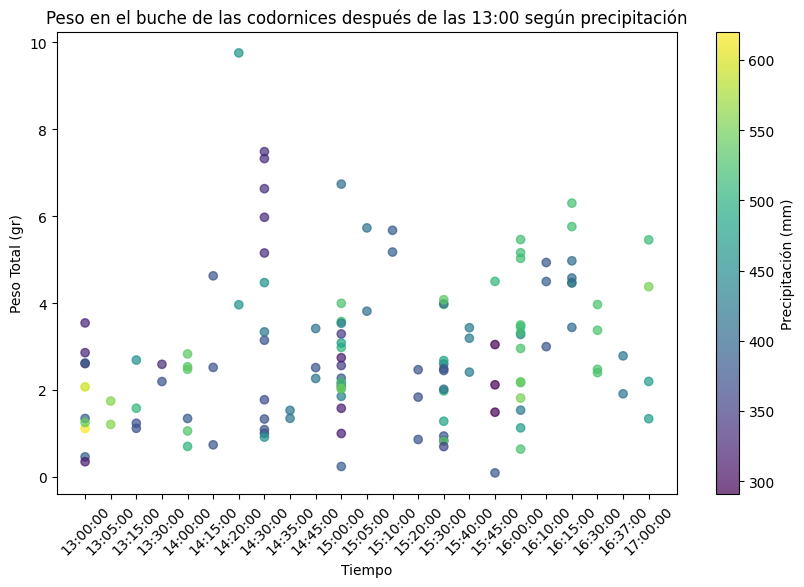

In [613]:
# Crear la gráfica de dispersión solo para df_mayor_13
plt.figure(figsize=(10, 6))

# Obtener los valores de precipitación
precipitacion = df_pp['ppanual17']

vmin = df_pp['ppanual17'].min()
vmax = df_pp['ppanual17'].max()

# Graficar los puntos con colores de gradiente según la precipitación
plt.scatter(df_pp['time'], df_pp['peso total'],  c=df_pp['ppanual17'], cmap='viridis',vmin=vmin, vmax=vmax, alpha=0.7)

# Añadir etiquetas y título
plt.xlabel('Tiempo')
plt.ylabel('Peso Total (gr)')
plt.title('Peso en el buche de las codornices después de las 13:00 según precipitación')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Mostrar la barra de colores para indicar la escala de precipitación
cbar = plt.colorbar(label='Precipitación (mm)')

# Guardar la gráfica
plt.savefig('./Graficos/PesoTotal_vs_Tiempo_vs_Precipitacion_despues_13.png', bbox_inches='tight')

# Mostrar la gráfica
plt.show()

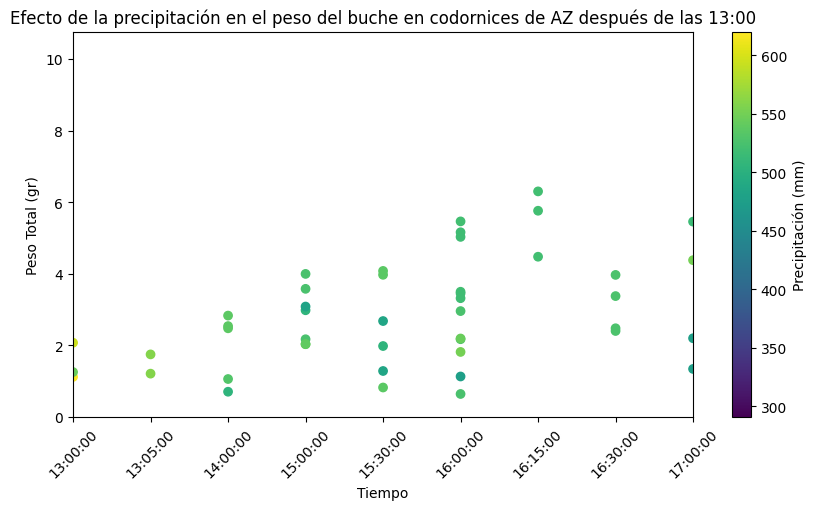

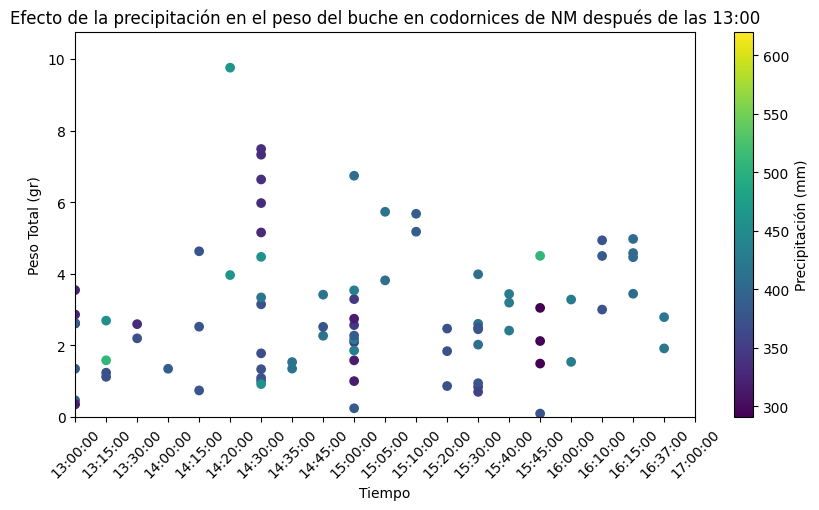

In [614]:
# Filtrar los datos para AZ y NM
df_az = df_pp[df_pp['estado'] == 'AZ']
df_nm = df_pp[df_pp['estado'] == 'NM']

vmin = min(df_pp['ppanual17'].min(), df_az['ppanual17'].min(), df_nm['ppanual17'].min())
vmax = max(df_pp['ppanual17'].max(), df_az['ppanual17'].max(), df_nm['ppanual17'].max())

# Obtener límites de los ejes x
xmin = min(df_az['time'].min(), df_nm['time'].min())
xmax = max(df_az['time'].max(), df_nm['time'].max())

# Obtener el rango máximo de peso total para ambos estados
y_max = max(df_az['peso total'].max(), df_nm['peso total'].max())

# Establecer límites en el eje y para ambos estados
y_lim = (0, y_max + 1)

# Gráfica para AZ
plt.figure(figsize=(10, 5))
plt.scatter(df_az['time'], df_az['peso total'], c=df_az['ppanual17'], cmap='viridis', vmin=vmin, vmax=vmax, label='AZ')
plt.colorbar(label='Precipitación (mm)')
plt.xticks(rotation=45)
plt.xlabel('Tiempo')
plt.ylabel('Peso Total (gr)')
plt.title('Efecto de la precipitación en el peso del buche en codornices de AZ después de las 13:00')
plt.ylim(y_lim)  # Establecer límites en el eje y
plt.xlim(xmin, xmax)  # Establecer límites en el eje x
# Guardar la gráfica
plt.savefig('./Graficos/PesoTotal_Tiempo_Precipitacion_AZ_despues_13.png', bbox_inches='tight')

# Gráfica para NM
plt.figure(figsize=(10, 5))
plt.scatter(df_nm['time'], df_nm['peso total'], c=df_nm['ppanual17'], cmap='viridis', vmin=vmin, vmax=vmax,label='NM')
plt.colorbar(label='Precipitación (mm)')
plt.xticks(rotation=45)
plt.xlabel('Tiempo')
plt.ylabel('Peso Total (gr)')
plt.title('Efecto de la precipitación en el peso del buche en codornices de NM después de las 13:00')
plt.ylim(y_lim)  # Establecer límites en el eje y
plt.xlim(xmin, xmax)  # Establecer límites en el eje x
# Guardar la gráfica
plt.savefig('./Graficos/PesoTotal_Tiempo_Precipitacion_NM_despues_13.png', bbox_inches='tight')

plt.show()

C:\Users\vesna\AppData\Local\Temp\ipykernel_19252\3213467025.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



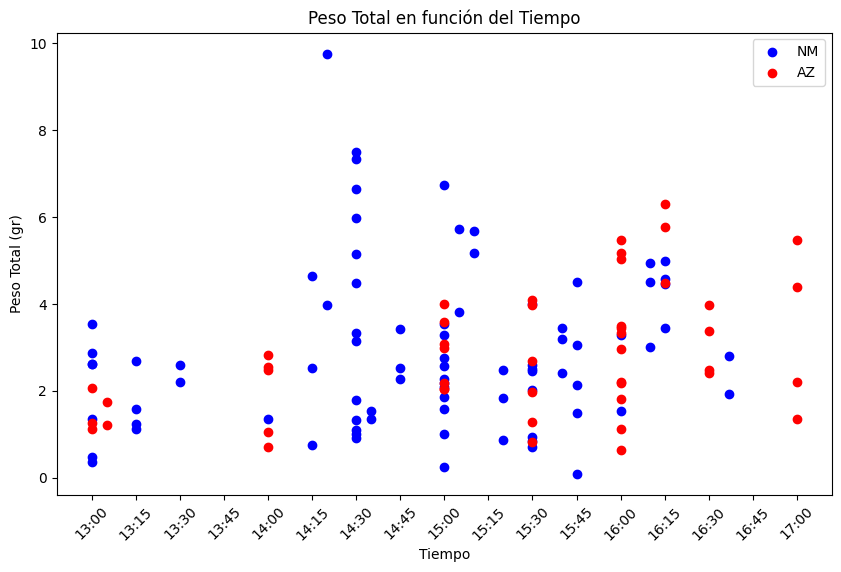

In [615]:
# Convertir la columna 'time' a datetime
df_mayor_13['time'] = pd.to_datetime(df_mayor_13['time'])

color = ['blue','red']
i = 0
# Crear la gráfica de dispersión
plt.figure(figsize=(10, 6))
for estado in df_mayor_13['estado'].unique():
    df_estado = df_mayor_13[df_mayor_13['estado'] == estado]
    plt.scatter(df_estado['time'], df_estado['peso total'], label=estado,color=color[i])
    i+=1

# Añadir etiquetas y título
plt.xlabel('Tiempo')
plt.ylabel('Peso Total (gr)')
plt.title('Peso Total en función del Tiempo')

# Obtener los ticks del eje x y formatearlos como horas y minutos
ticks = pd.date_range(df_mayor_13['time'].min(), df_mayor_13['time'].max(), freq='15min')
tick_labels = [tick.strftime('%H:%M') for tick in ticks]
plt.xticks(ticks, tick_labels)

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Mostrar la leyenda
plt.legend()

plt.savefig('./Graficos/PesoTotal_Tiempo_Estado_despues_13.png', bbox_inches='tight')

# Mostrar la gráfica
plt.show()

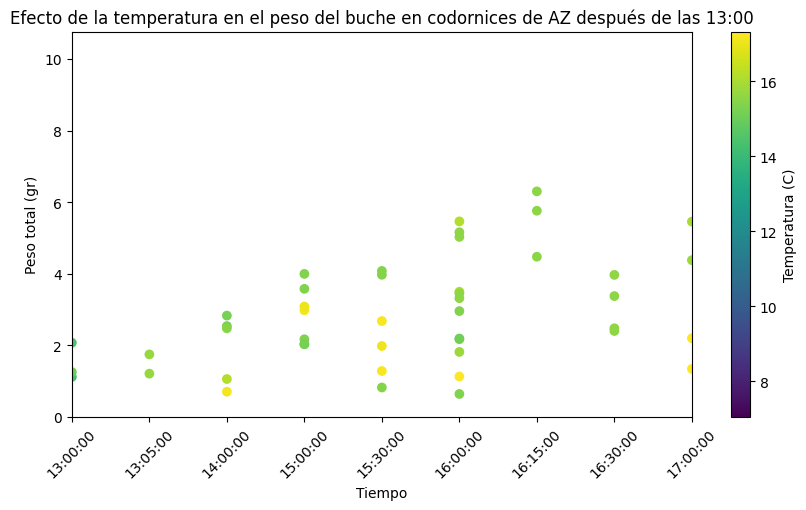

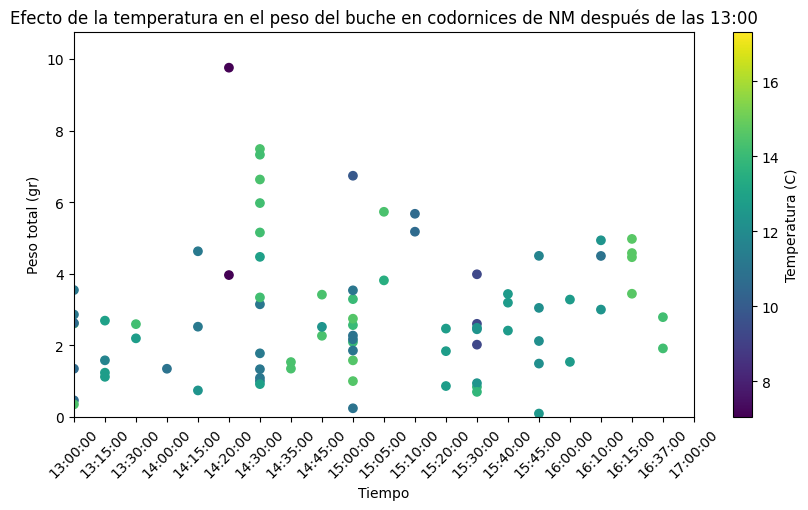

In [616]:
# Filtrar los datos para AZ y NM
df_az = df_pp[df_pp['estado'] == 'AZ']
df_nm = df_pp[df_pp['estado'] == 'NM']

vmin = min(df_pp['tmedia17'].min(), df_az['tmedia17'].min(), df_nm['tmedia17'].min())
vmax = max(df_pp['tmedia17'].max(), df_az['tmedia17'].max(), df_nm['tmedia17'].max())

# Obtener límites de los ejes x
xmin = min(df_az['time'].min(), df_nm['time'].min())
xmax = max(df_az['time'].max(), df_nm['time'].max())

# Obtener el rango máximo de peso total para ambos estados
y_max = max(df_az['peso total'].max(), df_nm['peso total'].max())

# Establecer límites en el eje y para ambos estados
y_lim = (0, y_max + 1)

# Gráfica para AZ
plt.figure(figsize=(10, 5))
plt.scatter(df_az['time'], df_az['peso total'], c=df_az['tmedia17'], cmap='viridis', vmin=vmin, vmax=vmax, label='AZ')
plt.colorbar(label='Temperatura (C)')
plt.xticks(rotation=45)
plt.xlabel('Tiempo')
plt.ylabel('Peso total (gr)')
plt.title('Efecto de la temperatura en el peso del buche en codornices de AZ después de las 13:00')
plt.ylim(y_lim)  # Establecer límites en el eje y
plt.xlim(xmin, xmax)  # Establecer límites en el eje x
# Guardar la gráfica
plt.savefig('./Graficos/PesoTotal_Tiempo_Temperatura_AZ_despues_13.png', bbox_inches='tight')

# Gráfica para NM
plt.figure(figsize=(10, 5))
plt.scatter(df_nm['time'], df_nm['peso total'], c=df_nm['tmedia17'], cmap='viridis', vmin=vmin, vmax=vmax,label='NM')
plt.colorbar(label='Temperatura (C)')
plt.xticks(rotation=45)
plt.xlabel('Tiempo')
plt.ylabel('Peso total (gr)')
plt.title('Efecto de la temperatura en el peso del buche en codornices de NM después de las 13:00')
plt.ylim(y_lim)  # Establecer límites en el eje y
plt.xlim(xmin, xmax)  # Establecer límites en el eje x
# Guardar la gráfica
plt.savefig('./Graficos/PesoTotal_Tiempo_Temperatura_NM_despues_13.png', bbox_inches='tight')

plt.show()

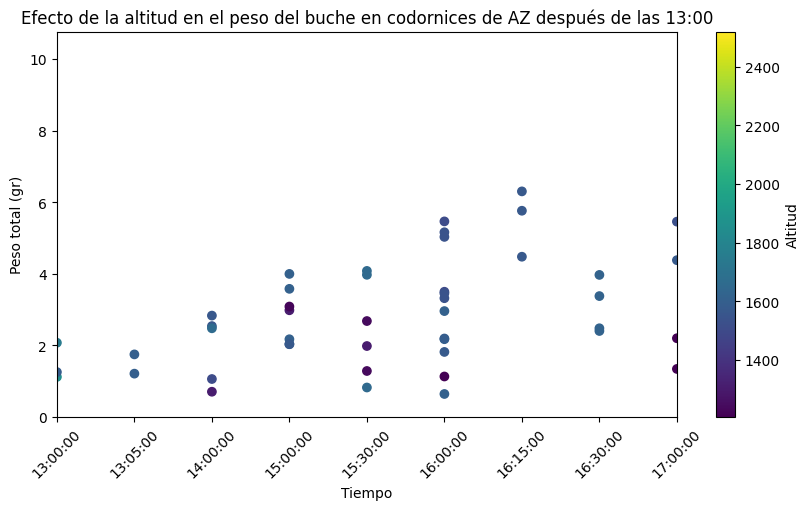

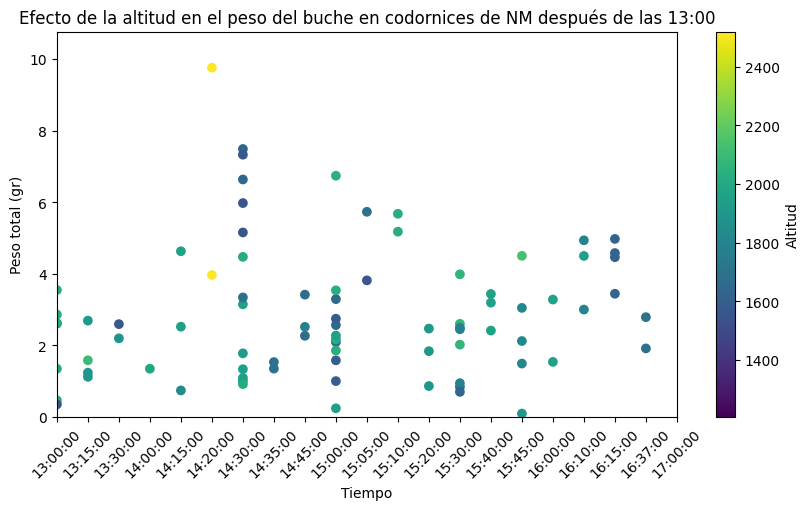

In [620]:
# Filtrar los datos para AZ y NM
df_az = df_pp[df_pp['estado'] == 'AZ']
df_nm = df_pp[df_pp['estado'] == 'NM']

vmin = min(df_pp['altitud'].min(), df_az['altitud'].min(), df_nm['altitud'].min())
vmax = max(df_pp['altitud'].max(), df_az['altitud'].max(), df_nm['altitud'].max())

# Obtener límites de los ejes x
xmin = min(df_az['time'].min(), df_nm['time'].min())
xmax = max(df_az['time'].max(), df_nm['time'].max())

# Obtener el rango máximo de peso total para ambos estados
y_max = max(df_az['peso total'].max(), df_nm['peso total'].max())

# Establecer límites en el eje y para ambos estados
y_lim = (0, y_max + 1)

# Gráfica para AZ
plt.figure(figsize=(10, 5))
plt.scatter(df_az['time'], df_az['peso total'], c=df_az['altitud'], cmap='viridis', vmin=vmin, vmax=vmax, label='AZ')
plt.colorbar(label='Altitud')
plt.xticks(rotation=45)
plt.xlabel('Tiempo')
plt.ylabel('Peso total (gr)')
plt.title('Efecto de la altitud en el peso del buche en codornices de AZ después de las 13:00')
plt.ylim(y_lim)  # Establecer límites en el eje y
plt.xlim(xmin, xmax)  # Establecer límites en el eje x
# Guardar la gráfica
plt.savefig('./Graficos/PesoTotal_Tiempo_Altitud_AZ_despues_13.png', bbox_inches='tight')

# Gráfica para NM
plt.figure(figsize=(10, 5))
plt.scatter(df_nm['time'], df_nm['peso total'], c=df_nm['altitud'], cmap='viridis', vmin=vmin, vmax=vmax,label='NM')
plt.colorbar(label='Altitud')
plt.xticks(rotation=45)
plt.xlabel('Tiempo')
plt.ylabel('Peso total (gr)')
plt.title('Efecto de la altitud en el peso del buche en codornices de NM después de las 13:00')
plt.ylim(y_lim)  # Establecer límites en el eje y
plt.xlim(xmin, xmax)  # Establecer límites en el eje x
# Guardar la gráfica
plt.savefig('./Graficos/PesoTotal_Tiempo_Altitud_NM_despues_13.png', bbox_inches='tight')

plt.show()